In [1]:
import pandas as pd
import numpy as np

### Load `source_target_weight` unwrangled data

In [7]:
date_time = "2023-05-31_13:06"
date_time = "2023-05-31_17:24"
date_time = "2023-06-01_14:32"
date_time = "2023-06-01_15:06"
# date_time = "2023-06-01_15:12"
# date_time = "2023-09-14_20:09" # ioral


source_target_dir = "/projects/genomic-ml/da2343/ml_project_1/model_complexity/source_target"
source_target_df = pd.read_csv(f"{source_target_dir}/source_target_{date_time}.csv")

In [10]:
source_target_df

,source,target,weight,algorithm,data_set_name,fold_id,index_of_pred_col,threshold
0,1,0,0.836520,Pearson,crohns,0,4,0.467
1,2,0,0.799345,Pearson,crohns,0,4,0.467
2,2,1,0.866038,Pearson,crohns,0,4,0.467
3,4,0,0.509016,Pearson,crohns,0,4,0.467
4,1,0,0.834875,Spearman,crohns,0,4,0.400
...,...,...,...,...,...,...,...,...
208,4,1,0.418054,Pearson,crohns,2,2,0.000
209,4,2,0.346450,Pearson,crohns,2,2,0.000
210,4,3,0.552727,Pearson,crohns,2,2,0.000
211,1,0,0.805998,Spearman,crohns,2,2,0.800


### Generating `source_target_weight` dataframe for **Pearson**, **Spearman** and **GGM** algorithms

In [11]:
algorithm_list = source_target_df["algorithm"].unique()

for algorithm in algorithm_list:
    filtered_algorithm_df = source_target_df[source_target_df["algorithm"] == algorithm]
    # Get unique values as list from column name `Dataset`
    dataset_list = filtered_algorithm_df["data_set_name"].unique().tolist()
    for dataset in dataset_list:
        # Get new dataframe with only the dataset
        sub_dataset_df = filtered_algorithm_df[filtered_algorithm_df["data_set_name"] == dataset]
        fold_id_list = sub_dataset_df["fold_id"].unique().tolist()
        
        test_error_df_list = []
        for fold_id  in fold_id_list:
            filtered_fold_id_df = sub_dataset_df[sub_dataset_df["fold_id"] == fold_id]
            if algorithm in ["Pearson", "Spearman"]:
                optimum_threshold = filtered_fold_id_df["threshold"].mean()
                # print(f"Optimum threshold for {algorithm} is {optimum_threshold}")
            # get only the source, target and weight columns
            filtered_fold_id_df = filtered_fold_id_df[["source", "target", "weight"]]
            if algorithm in ["Pearson", "Spearman"]:
                print(f"Optimum threshold for {algorithm} is {optimum_threshold}")
                filtered_fold_id_df = filtered_fold_id_df[ abs(filtered_fold_id_df["weight"]) > optimum_threshold]
            # find the mean of the weight column using the source and target columns
            filtered_fold_id_df = filtered_fold_id_df.groupby(["source", "target"]).mean().reset_index()
            test_error_df_list.append(filtered_fold_id_df)
            print(f"Fold {fold_id} done")
        test_err_df = pd.concat(test_error_df_list)
        # find the median of the weight column using the source and target columns
        test_err_df = test_err_df.groupby(["source", "target"]).median().reset_index()
        # print(test_err_df) 
        # save {dataset}_{algorithm}_source_target.csv
        test_err_df.to_csv(f"{dataset}_{algorithm}_source_target.csv", index=False)
            
     


Optimum threshold for Pearson is 0.39765999999999996
Fold 0 done
Optimum threshold for Pearson is 0.18421052631578944
Fold 1 done
Optimum threshold for Pearson is 0.1313953488372093
Fold 2 done
Optimum threshold for Spearman is 0.3692307692307693
Fold 0 done
Optimum threshold for Spearman is 0.19696969696969693
Fold 1 done
Optimum threshold for Spearman is 0.30833333333333335
Fold 2 done
Fold 0 done
Fold 1 done
Fold 2 done


In [69]:
source_target_df

,source,target,weight,algorithm,data_set_name,fold_id,index_of_pred_col,threshold
0,6,0,0.544370,Pearson,amgut2,0,32,0.505
1,9,0,0.524918,Pearson,amgut2,0,32,0.505
2,9,6,0.618419,Pearson,amgut2,0,32,0.505
3,10,1,0.531710,Pearson,amgut2,0,32,0.505
4,12,6,0.631396,Pearson,amgut2,0,32,0.505
...,...,...,...,...,...,...,...,...
1678655,137,129,0.418196,Spearman,amgut2,2,108,0.300
1678656,137,130,0.460548,Spearman,amgut2,2,108,0.300
1678657,137,132,0.346344,Spearman,amgut2,2,108,0.300
1678658,137,133,0.378489,Spearman,amgut2,2,108,0.300


### Generating `source_target_weight` dataframe for LASSO

In [12]:

source_target_df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_1/model_complexity/lasso_coef/lasso_coef_{date_time}.csv")

algorithm = "LASSO"
filtered_algorithm_df = source_target_df[source_target_df["algorithm"] == algorithm]
dataset_list = filtered_algorithm_df["data_set_name"].unique().tolist()

for dataset in dataset_list:
    # Get new dataframe with only the dataset
    sub_dataset_df = filtered_algorithm_df[filtered_algorithm_df["data_set_name"] == dataset]
    fold_id_list = sub_dataset_df["fold_id"].unique().tolist()
    
    # Create an empty list to store the source, target and weight dataframes
    source_target_list = []
    for fold_id in fold_id_list:
        filtered_fold_id_df = sub_dataset_df[sub_dataset_df["fold_id"] == fold_id]
        reg_param_list = filtered_fold_id_df["reg_param"].unique().tolist()
        best_validation_score = np.inf
        
        for reg_param in reg_param_list:
            filtered_reg_param = filtered_fold_id_df[filtered_fold_id_df["reg_param"] == reg_param]
            subtrain_score = filtered_reg_param['subtrain_score'].mean()
            validation_score = filtered_reg_param['validation_score'].mean()
            index_of_pred_col_list = sorted(filtered_reg_param["index_of_pred_col"].unique().tolist())
            
            coef_matrix_list = []
            for index_of_pred_col in index_of_pred_col_list:
                filtered_index_of_pred = filtered_reg_param[filtered_reg_param['index_of_pred_col'] == index_of_pred_col]
                coefs = filtered_index_of_pred['coefs'].values.tolist()
                coefs_str = coefs[0]
                # Replace "None" with "nan"
                coefs_str = coefs_str.replace("None", "nan")
                coefs_str = coefs_str.replace("\n", "")
                coefs_str = coefs_str.replace("[", "")
                coefs_str = coefs_str.replace("]", "")
                
                # Convert string to numpy array
                coefs_arr = np.fromstring(coefs_str, sep=" ")
                coef_matrix_list.append(coefs_arr)
                
            # Convert the list of numpy arrays into a matrix
            coefs_mat = np.array(coef_matrix_list)
            # get the indices of the upper and lower triangle elements
            upper_tri = np.triu_indices(coefs_mat.shape[0], k=1)
            lower_tri = np.tril_indices(coefs_mat.shape[0], k=-1)
            # calculate the average of the upper and lower triangle elements
            avg_matrix = (coefs_mat + coefs_mat.T) / 2
            coefs_mat[lower_tri] = avg_matrix[lower_tri]
            coefs_mat[upper_tri] = np.nan
            # replace the diagonal elements with nan
            np.fill_diagonal(coefs_mat, np.nan)
            source_target = np.argwhere(~np.isnan(coefs_mat))
            weights = coefs_mat[source_target[:, 0], source_target[:, 1]]
            source_target_result = [t for t in zip(source_target[:, 0], source_target[:, 1], weights) if np.abs(t[2]) > 0]
            
           
            
            # Create a dataframe with source, target and weight columns
            source_target_df = pd.DataFrame(source_target_result, 
                                            columns=["source", "target", "weight"])
            
            # remove where source_target_df contains duplicates like (0, 1) and (1, 0) for source and target even for different weights
            # source_target_df = source_target_df[~source_target_df.duplicated(subset=["source", "target"], keep=False)]
            
            # source_target_df["algorithm"] = algorithm
            # source_target_df["data_set_name"] = dataset
            # source_target_df["fold_id"] = fold_id
            # Find the best reg_param that has the minimum validation error
            # print(f"FoldId: {fold_id}, Reg_param: {np.log10(reg_param)}, Validation score: {validation_score}")
            # print(source_target_df.shape)
            if validation_score <= best_validation_score:
                best_validation_score = validation_score
                best_reg_param = reg_param
                best_source_target_df = source_target_df
        # get only the source, target and weight columns
        # print(f"FoldId: {fold_id}, Best reg_param: {np.log10(best_reg_param)}")
        source_target_list.append(best_source_target_df)
    source_target_pd = pd.concat(source_target_list)
    source_target_pd = source_target_pd.groupby(["source", "target"]).median().reset_index()
    
    # apply the function to create a new column with sorted values
    source_target_pd['sorted'] = source_target_pd.apply(lambda x: sorted([x['source'], x['target']]) , axis=1)

    # drop duplicates based on the Sorted column and keep the first occurrence
    source_target_pd = source_target_pd.drop_duplicates(subset='sorted', keep='first')

    # drop the Sorted column
    source_target_pd = source_target_pd.drop('sorted', axis=1)

    source_target_pd.to_csv(f"{dataset}_{algorithm}_source_target.csv", index=False)

### Generate `Algorithm`, `Positive Association`, `Negative Association` and `Number of Edges` from the `source_target_weight` data

9
10
9
9


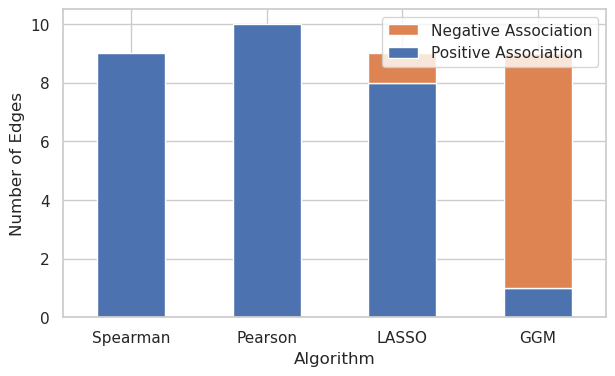

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# dataset_name = "amgut1"
# dataset_name = "amgut2"
dataset_name = "crohns"
# dataset_name = "ioral"

algorithm_dict = {
    "Spearman": f"{dataset_name}_Spearman_source_target.csv",
    "Pearson": f"{dataset_name}_Pearson_source_target.csv",
    "LASSO": f"{dataset_name}_LASSO_source_target.csv",
    "GGM": f"{dataset_name}_GGM_source_target.csv"
}

algo_edges_df_list = []
for algorithm, source_target_file in algorithm_dict.items():
    local_df = pd.read_csv(source_target_file)
    # create a new row as a dictionary
    new_row = {
        "Positive Association": local_df["weight"].value_counts().loc[lambda x: x.index > 0].sum(),
        "Negative Association": local_df["weight"].value_counts().loc[lambda x: x.index < 0].sum(),
        "Algorithm": algorithm}
    # use pandas.concat() to append the new row to an empty dataframe
    new_df = pd.concat([pd.DataFrame(), pd.DataFrame(new_row, index=[0])])
    # new_df["Number of Edges"] = local_df["weight"].count()
    print(local_df["weight"].count())
    algo_edges_df_list.append(new_df)

algo_edges_df = pd.concat(algo_edges_df_list)

# plot the stacked bar plot using matplotlib
sns.set(style="whitegrid")
ax = algo_edges_df.set_index('Algorithm').plot.bar(
    stacked=True, figsize=(7, 4))

# set the labels and title
plt.xlabel("Algorithm")
plt.ylabel("Number of Edges")
# plt.title("Number of Edges by Algorithm and Association")

# draw a horizontal line at y=8000
# ax.axhline(y=8128, color='red', linestyle='--')

# add a text annotation
# ax.text(x=0.5, y=8500, s='Maximum number of edges = 8128', color='red')

# make the x-axis labels horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 0]
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order])

# save the plot and give it 900dpi resolution
# plt.savefig(f'{dataset_name}_stacked-bar-plot.png', dpi=1000, bbox_inches='tight')

# show the plot
plt.show()
